# Project: Investigation of TMDB Data Set 
## By Mohamed Ali

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Background
What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over 100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?
>
>This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.
>
>Data Source Transfer Summary
We (Kaggle) have removed the original version of this dataset per a DMCA takedown request from IMDB. In order to minimize the impact, we're replacing it with a similar set of films and data fields from The Movie Database (TMDb) in accordance with their terms of use. The bad news is that kernels built on the old dataset will most likely no longer work.
>
>The good news is that:
>You can port your existing kernels over with a bit of editing. This kernel offers functions and examples for doing so. You can also find a general introduction to the new format here.
>
>The new dataset contains full credits for both the cast and the crew, rather than just the first three actors.
>
>Actor and actresses are now listed in the order they appear in the credits. It's unclear what ordering the original dataset used; for the movies I spot checked it didn't line up with either the credits order or IMDB's stars order.
>
>The revenues appear to be more current. For example, IMDB's figures for Avatar seem to be from 2010 and understate the film's global revenues by over 2 billion.
>
>Some of the movies that we weren't able to port over (a couple of hundred) were just bad entries. For example, this IMDB entry has basically no accurate information at all. It lists Star Wars Episode VII as a documentary.
>
>Data Source Transfer Details
Several of the new columns contain json. You can save a bit of time by porting the load data functions [from this kernel]().
>
>Even in simple fields like runtime may not be consistent across versions. For example, previous dataset shows the duration for Avatar's extended cut while TMDB shows the time for the original version.
>
>There's now a separate file containing the full credits for both the cast and crew.
>
>All fields are filled out by users so don't expect them to agree on keywords, genres, ratings, or the like.
>
>Your existing kernels will continue to render normally until they are re-run.
>
>If you are curious about how this dataset was prepared, the code to access TMDb's API is posted here.

>New columns:
><ul>
><li><a href="#01">homepage</a></li>
><li><a href="#02">id</a></li>
><li><a href="#03">original_title</a></li>
><li><a href="#04">overview</a></li>
><li><a href="#05">popularity</a></li>
><li><a href="#06">production_companies</a></li>
><li><a href="#07">production_countries</a></li>
><li><a href="#08">release_date</a></li>
><li><a href="#09">spoken_languages</a></li>
><li><a href="#10">status</a></li>
><li><a href="#11">tagline</a></li>
><li><a href="#12">vote_average</a></li>
></ul>

>Open Questions About the Data
There are some things we haven't had a chance to confirm about the new dataset. If you have any insights, please let us know in the forums!
>
>Are the budgets and revenues all in US dollars? Do they consistently show the global revenues?
>
>This dataset hasn't yet gone through a data quality analysis. Can you find any obvious corrections? For example, in the IMDb 
version it was necessary to treat values of zero in the budget field as missing. Similar findings would be very helpful to your fellow Kagglers! (It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place).
>
>Inspiration
Can you categorize the films by type, such as animated or not? We don't have explicit labels for this, but it should be possible to build them from the crew's job titles.
>
>How sharp is the divide between major film studios and the independents? Do those two groups fall naturally out of a clustering analysis or is something more complicated going on?
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

# Ask Questions
## Questions for Analysis

><ul>
><li><a href="#Q01">Q01: Whice movies have most popularity?</a></li>
><li><a href="#Q02">Q02: Which movies have large profit?</a></li>
><li><a href="#Q03">Q03: Which genres are most trends cross the years?</a></li>
><li><a href="#Q04">Q04: Does the trend of movie type changing with time?</a></li>
><li><a href="#Q05">Q05: Who’ve Been In the Most Movies?</a></li>
><li><a href="#Q06">Q06: Who is Directors with higest Movies?</a></li>
><li><a href="#Q07">Q07: What is the relation between budget and revenue?</a></li>
><li><a href="#Q08">Q08: What is the number of films per month and average box office of single film?</a></li>
><li><a href="#Q09">Q09: What are the directors with high box office or high score?</a></li>
></ul>

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import imread
from scipy import stats

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
mo = pd.read_csv('tmdb-movies.csv')

In [3]:
mo.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df=mo.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline','keywords','production_companies'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [6]:
# Cheching for duplicate
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(keep=False,inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.dropna(how='any', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10730 non-null  int64  
 1   popularity      10730 non-null  float64
 2   budget          10730 non-null  int64  
 3   revenue         10730 non-null  int64  
 4   original_title  10730 non-null  object 
 5   cast            10730 non-null  object 
 6   director        10730 non-null  object 
 7   runtime         10730 non-null  int64  
 8   genres          10730 non-null  object 
 9   release_date    10730 non-null  object 
 10  vote_count      10730 non-null  int64  
 11  vote_average    10730 non-null  float64
 12  release_year    10730 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [11]:
# Rename cast to actors and crew to director
df.rename(columns={'cast':'actor','original_title':'title'}, inplace=True)
# Spliting release_date into three columns release_year, release_month, release_day
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year_d'] = pd.to_datetime(df.release_date, format = '%Y%m/%d',errors='coerce').dt.year
df['release_month'] = pd.to_datetime(df.release_date).apply(lambda x: x.month)
df['release_day'] = pd.to_datetime(df.release_date).apply(lambda x: x.day)
# Creating new columns call profit which is revenue - budget
df['profit'] = df['revenue'] - df['budget']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10730 non-null  int64         
 1   popularity      10730 non-null  float64       
 2   budget          10730 non-null  int64         
 3   revenue         10730 non-null  int64         
 4   title           10730 non-null  object        
 5   actor           10730 non-null  object        
 6   director        10730 non-null  object        
 7   runtime         10730 non-null  int64         
 8   genres          10730 non-null  object        
 9   release_date    10730 non-null  datetime64[ns]
 10  vote_count      10730 non-null  int64         
 11  vote_average    10730 non-null  float64       
 12  release_year    10730 non-null  int64         
 13  release_year_d  10730 non-null  int64         
 14  release_month   10730 non-null  int64         
 15  re

In [12]:
# Cheching for Nan values 
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
title             0
actor             0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
release_year_d    0
release_month     0
release_day       0
profit            0
dtype: int64

In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,release_year_d,release_month,release_day,profit
count,10730.000000,10730.000000,1.073000e+04,1.073000e+04,10730.000000,10730.000000,10730.00000,10730.000000,10730.000000,10730.000000,10730.000000,1.073000e+04
mean,65203.886114,0.652620,1.480223e+07,4.032356e+07,102.469804,219.823206,5.96480,2001.258807,2005.480615,6.832805,15.022181,2.552133e+07
std,91474.501015,1.004851,3.106566e+07,1.176573e+08,30.495126,578.841327,0.93028,12.820470,16.430373,3.434270,8.689284,9.715381e+07
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.50000,1960.000000,1972.000000,1.000000,1.000000,-4.139124e+08
25%,10547.250000,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.40000,1995.000000,1997.000000,4.000000,8.000000,0.000000e+00
50%,20317.500000,0.387069,0.000000e+00,0.000000e+00,99.000000,39.000000,6.00000,2006.000000,2007.000000,7.000000,15.000000,0.000000e+00
75%,73953.250000,0.721158,1.600000e+07,2.500000e+07,112.000000,148.000000,6.60000,2011.000000,2012.000000,10.000000,22.000000,9.985547e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.20000,2015.000000,2071.000000,12.000000,31.000000,2.544506e+09


In [14]:
df=df.drop(['release_year_d'],axis=1)

<a id='eda'></a>
## Exploratory Data Analysis



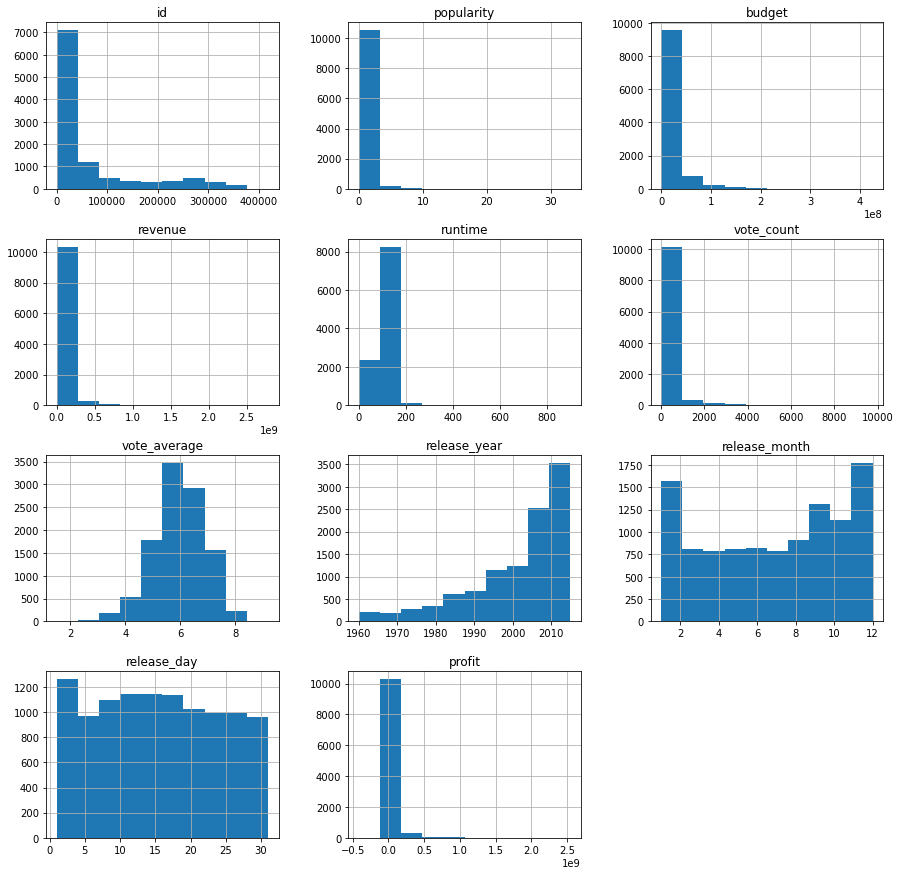

In [15]:
df.hist(figsize = (15,15));

From here, we will observe our variables of interest till now. Other variables that we might find intersting are year, month, vote_average and popularity. Following are the observations:

1.Most movies lie in the budget range 0 to 0.5 on a e to the power 8 scale.
2.Most movies were made in the months of January and December.
3.Most movies have popularity between 0 to 100.
4.Many movies have negative profit values which suggests loss making movies.
5.Most movies have revenue collection in the range 0 to 0.25 but on a e to the power of 9 scale.
6.Most movies have runtime in the range of 75 to 150.
7.Vote average has a bit scattered distribution than other variables with most movies lying in the range of 6-7 voting average.
8.Most movies have been released between the years 2000 and 2015.

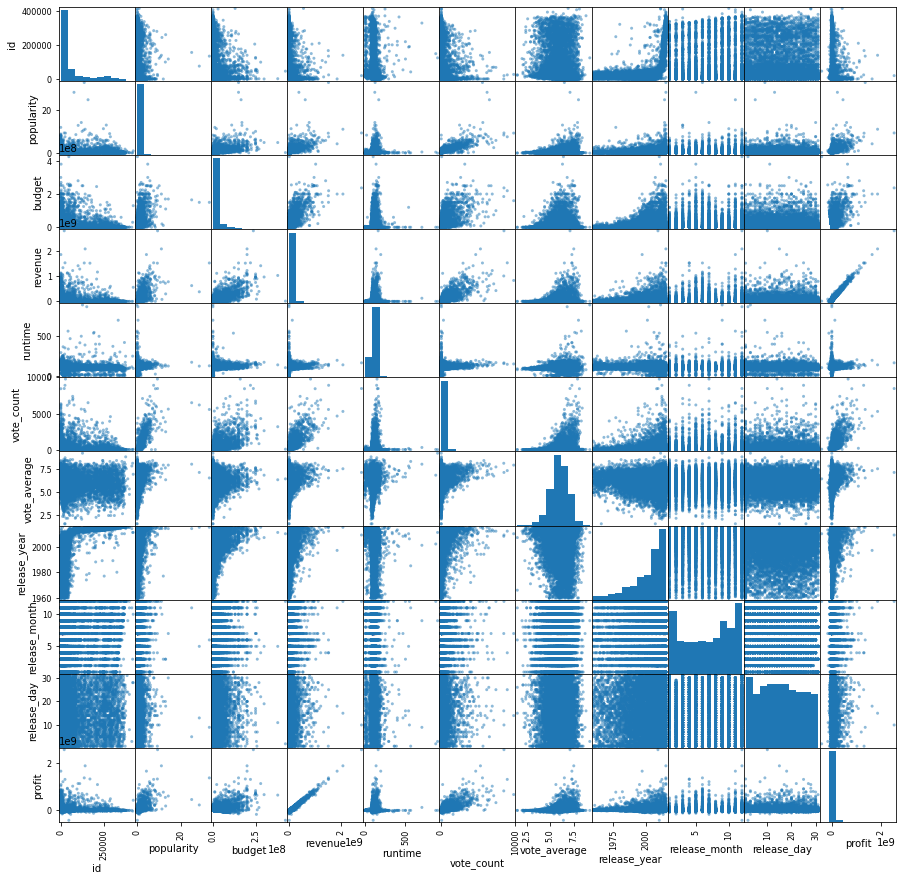

In [16]:
pd.plotting.scatter_matrix(df, figsize = (15,15));

Among these scatterplots we will observe our relations of interest:

Profit vs Popularity shows positive correlation.
Profit vs Revenue shows the highest positive correlation
Profit vs Runtime show positive but very low correlation
Vote Average vs Runtime also show positive but low correlation
Popularity vs runtime also has very low but positive correlation

### Research Question 1:  Which movies have most popularity?
>In order to under stand the affect of popularity on our data we need to known the top 10 most popular movies of all time

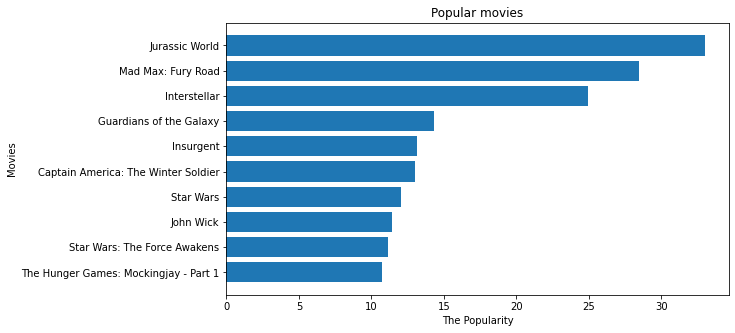

In [16]:
sorted_by_popularity = df.sort_values(by='popularity', ascending=False)
title = sorted_by_popularity.title[:10]

plt.subplots(figsize=(9,5))
plt.gca().invert_yaxis()
plt.title('Popular movies')
plt.ylabel('Movies')
plt.xlabel("The Popularity")
plt.barh(title, sorted_by_popularity['popularity'].head(10));

>We find our that Jurassic World was the most popular movie of all time

### Research Question 2 : Which movies have large profit?
>In order to under stand what's affec the movies profit we need to known the top 10 most profitable movies of all time

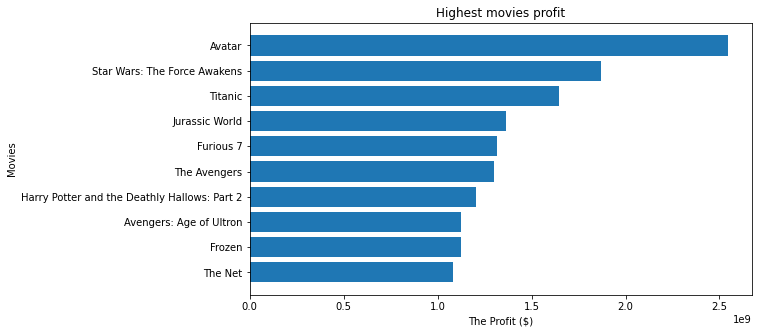

In [18]:
sorted_by_profit = df.sort_values(by='profit', ascending=False)

plt.subplots(figsize=(9,5))
plt.gca().invert_yaxis()
plt.title('Highest movies profit')
plt.ylabel('Movies')
plt.xlabel("The Profit ($)")
plt.barh(sorted_by_profit.title.head(10), sorted_by_profit.profit.head(10));

>we found that the top most profitable movies were not very popular also jurassic world were so popular and profitable so it looks like there is some kind of relation between popilarity and profit.

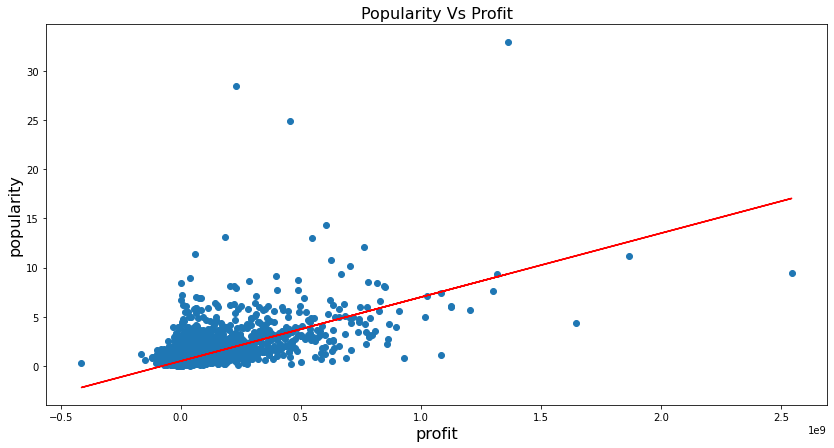

In [17]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['profit'],df['popularity'])
line = slope*df['profit']+intercept
plt.figure(figsize=(14,7))
plt.plot(df['profit'],line,color='red')
plt.scatter(df['profit'],df['popularity'])
plt.ylabel('popularity',fontsize=16)
plt.xlabel('profit',fontsize=16)
plt.title('Popularity Vs Profit',fontsize=16)
plt.show()

Profit vs Popularity shows positive correlation.

### Research Question 3 : Which genres are most trends?

In [20]:
#Removing Redundancy
genres = df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.split('|')

Text(0.5, 1.0, 'Top Genres')

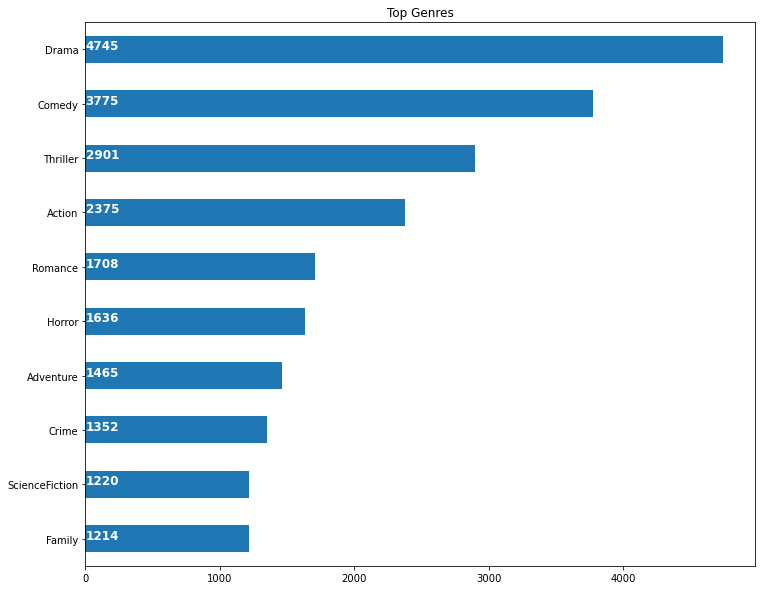

In [21]:
plt.subplots(figsize=(12,10))
genre = set()
list1 = []
for i in genres:
    list1.extend(i)
    genre = set().union(i,genre)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh()
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')

it looks like movies makers top genres is drama

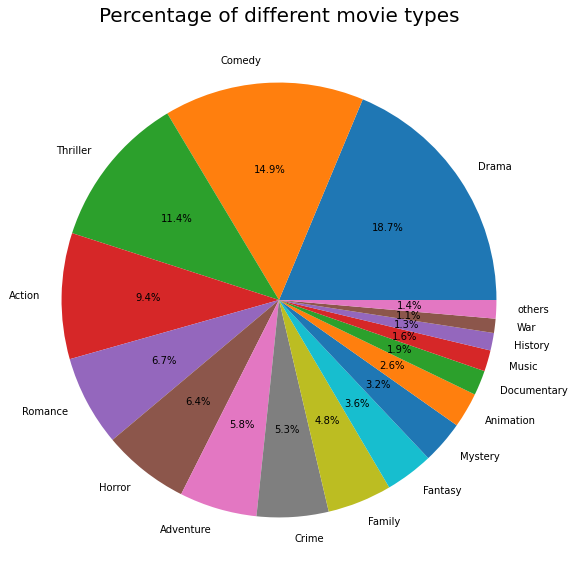

In [22]:
# Remove redundant elements
genre.discard('') 
# Turn genre into a list
genre_list = list(genre) 

# Create data box - Movie Type
genre_df = pd.DataFrame()  

# One hot encoding of movie types
for i in genre_list:
    # If it contains type i, it is encoded as 1, otherwise it is encoded as 0
    genre_df[i] = df['genres'].str.contains(i).apply(lambda x: 1 if x else 0)    

# Change the index of the data box to the year
genre_df.index = df['release_year']
# Calculate the total number of movies of each type and arrange them in descending order
grnre_sum = genre_df.sum().sort_values(ascending = False)
gen_shares = grnre_sum / grnre_sum.sum()

# Set the other class. When the proportion of movie types is less than% 1, all of them belong to the other class
others = 0.01
gen_pie = gen_shares[gen_shares >= others]
gen_pie['others'] = gen_shares[gen_shares < others].sum()

# Set split properties
# When the proportion is less than or equal to% 2, increase the percentage of edge deviation radius of each pie piece
explode = (gen_pie <= 0.02)/10

# Pie chart
gen_pie.plot(kind='pie',label='',autopct='%3.1f%%',figsize=(10,10))
plt.title('Percentage of different movie types',fontsize=20)
plt.savefig("Percentage of different movie types-Pie chart.png",dpi=1000)

Drama comes first with 19% of the industry after it comes comedy with nearly 15%

### Research Question 4 : Does the trend of movie type changing with time?

it's an important question that help use to understand if these numbers Really reflects reality or it just a trend affected by overall scaling effect

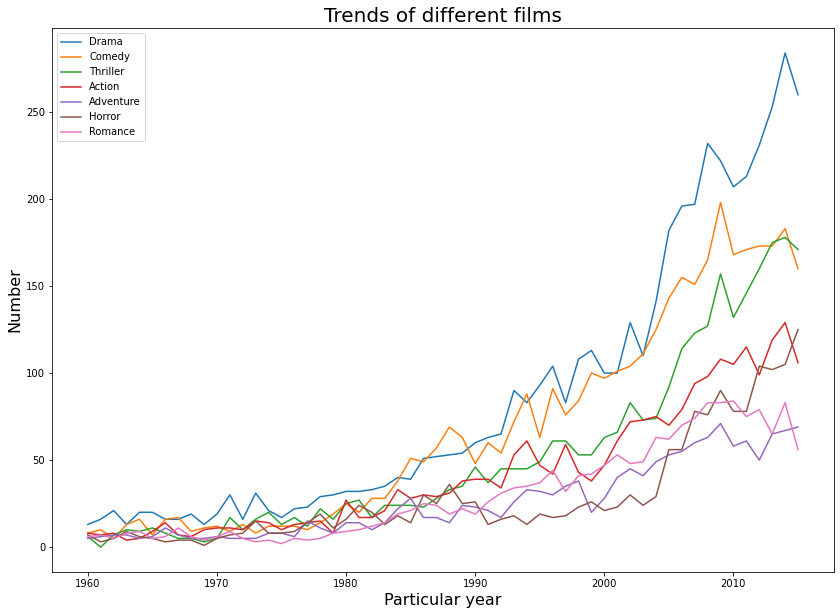

In [24]:
# The trend of movie type changing with time
gen_year_sum = genre_df.sort_index(ascending = False).groupby('release_year').sum()
gen_year_sum_sub = gen_year_sum[['Drama','Comedy','Thriller','Action','Adventure','Horror','Romance']]
gen_year_sum_sub.plot(figsize=(14,10))
plt.legend(gen_year_sum_sub.columns)
plt.xticks(range(1960,2015,10))
plt.xlabel('Particular year', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.title('Trends of different films', fontsize=20)
plt.savefig("Number of different movie types-Broken line figure 2.png",dpi=1000)

its looks like it wasn't just a trend but drama were always the top genre

### Research Question 5 : Who’ve Been In the Most Movies?

We all have our favourites. Some we remember because of their great performances. But others who’ve appeared in many films are completely forgotten or unknown. “Hey, it’s that guy from this, that or the other.”

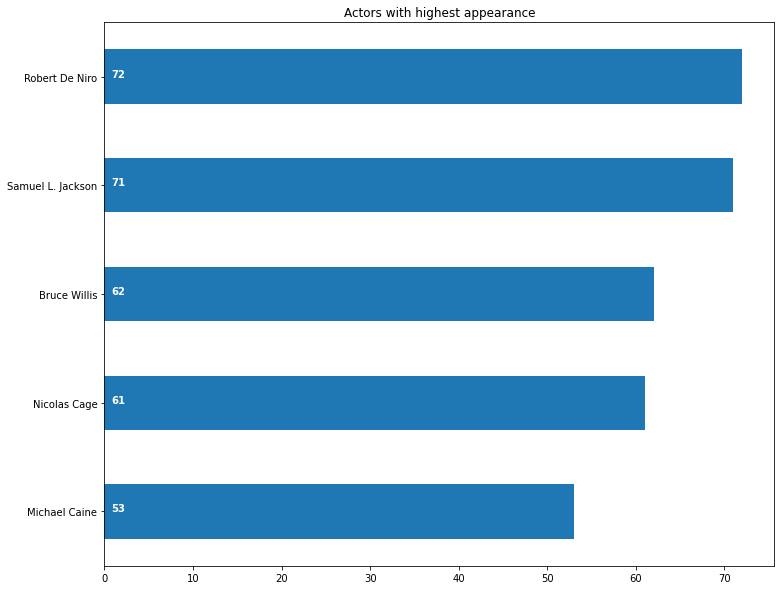

In [25]:
# Remove redundant elements
actor = df['actor'].str.replace("'",'').str.replace('"','').str.split('|') 
# Plotting fig
plt.subplots(figsize=(12,10))
list1=[]
for i in actor:
    list1.extend(i)
    # Sortting in a list in acsending order
ax=pd.Series(list1).value_counts()[:5].sort_values(ascending=True).plot.barh()
for i, v in enumerate(pd.Series(list1).value_counts()[:5].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

Everyone is probably thinking Robert De Niro, the actor who has starred in virtually any and every Hollywood GodFather film and Intern in recent memory.

### Research Question 6 : Who is Directors with higest Movies?

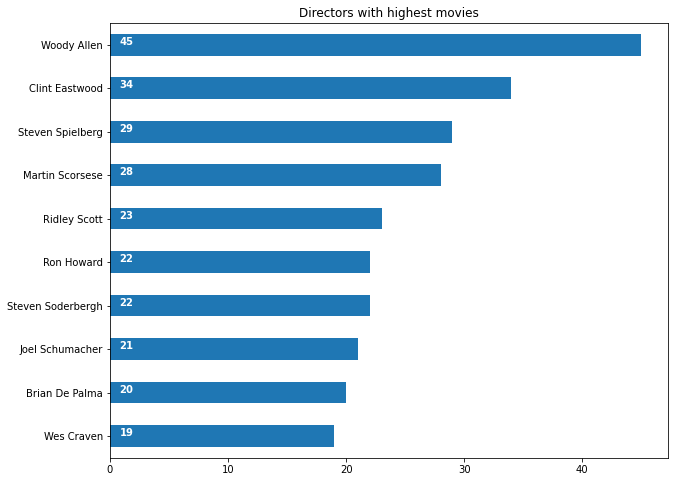

In [18]:
# Plotting fig

plt.subplots(figsize=(10,8))
# Sortting in a list in acsending order
ax = df[df['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh()
for i, v in enumerate(df[df['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

in our data set Woody Allen is number one with 27 movie also he acually has done At least 73 but this different due to lack of data

### Research Question 7 : What is the relation between budget and revenue?

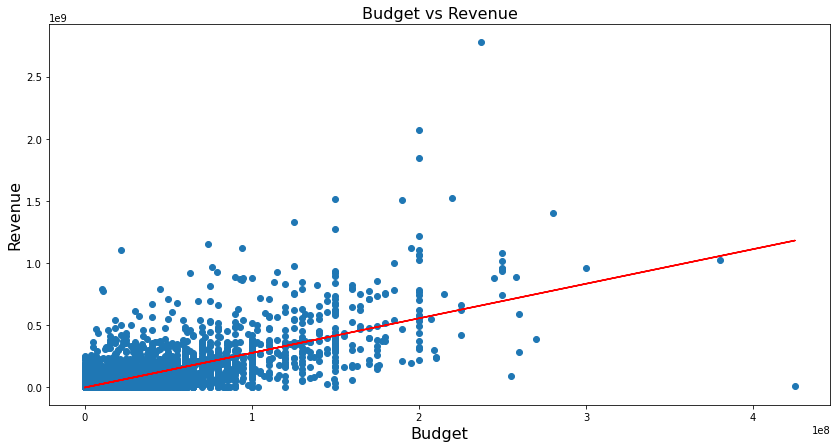

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['budget'],df['revenue'])
line = slope*df['budget']+intercept
plt.figure(figsize=(14,7))
plt.plot(df['budget'],line,color='red')
plt.scatter(df['budget'],df['revenue'])
plt.ylabel('Revenue',fontsize=16)
plt.xlabel('Budget',fontsize=16)
plt.title('Budget vs Revenue',fontsize=16)
plt.show()

Profit vs Revenue shows the highest positive correlation

### Research Question 8 : What is the number of films per month and average box office of single film?

894.1666666666666
41771568.72122019


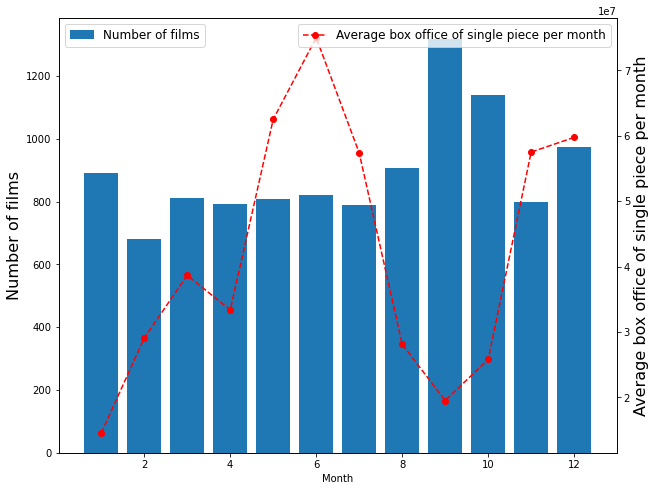

In [20]:
fig = plt.figure(figsize=(10,8))

x = list(range(1,13))
y1 = df.groupby('release_month').revenue.size() 
y2 = df.groupby('release_month').revenue.mean()# Average box office of single piece per month

# Left axis
ax1 = fig.add_subplot(1,1,1)
plt.bar(x,y1,label='Number of films')
plt.grid(False)
ax1.set_xlabel('Month')                   # Set x-axis label, Y-axis label
ax1.set_ylabel('Number of films',fontsize=16)
ax1.legend(loc=2,fontsize=12)

# Right axis
ax2 = ax1.twinx()
plt.plot(x,y2,'ro--',label='Average box office of single piece per month')
ax2.set_ylabel('Average box office of single piece per month',fontsize=16)
ax2.legend(loc=1,fontsize=12)

plt.savefig('Number of films per month and average box office of single film.png')

print(y1.mean())
print(y2.mean())

The Number of filme per monuth = 894.1666666666666 nearly = 895.

The Average box office of single piece per month = 41771568.72122019.

### Research Question 9 : What are the directors with high box office or high score?

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             10730 non-null  int64         
 1   popularity     10730 non-null  float64       
 2   budget         10730 non-null  int64         
 3   revenue        10730 non-null  int64         
 4   title          10730 non-null  object        
 5   actor          10730 non-null  object        
 6   director       10730 non-null  object        
 7   runtime        10730 non-null  int64         
 8   genres         10730 non-null  object        
 9   release_date   10730 non-null  datetime64[ns]
 10  vote_count     10730 non-null  int64         
 11  vote_average   10730 non-null  float64       
 12  release_year   10730 non-null  int64         
 13  release_month  10730 non-null  int64         
 14  release_day    10730 non-null  int64         
 15  profit         1073

<class 'pandas.core.frame.DataFrame'>
Index: 5018 entries, Kyle Balda|Pierre Coffin to Jonah Markowitz
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   revenue       5018 non-null   float64
 1   budget        5018 non-null   float64
 2   profit        5018 non-null   float64
 3   vote_average  5018 non-null   float64
dtypes: float64(4)
memory usage: 196.0+ KB


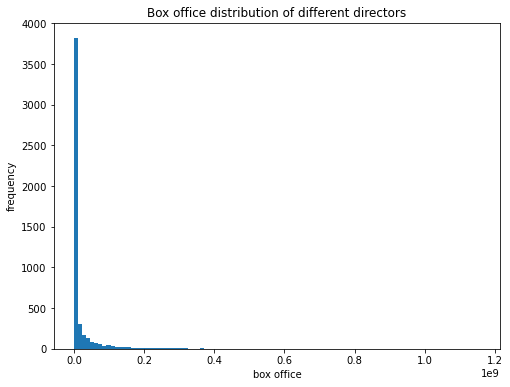

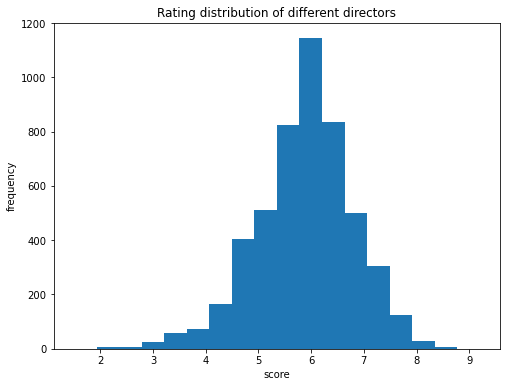

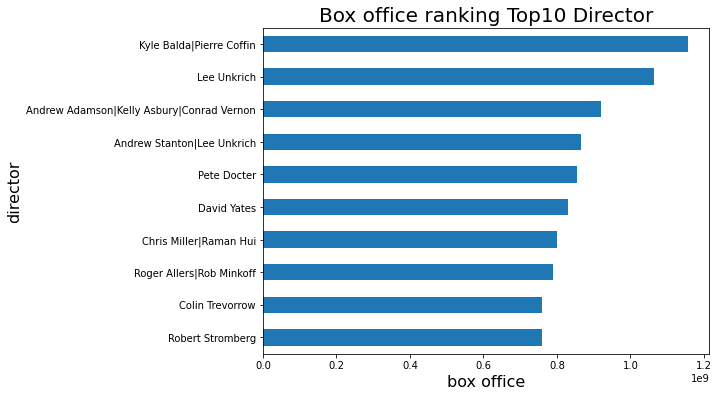

In [22]:

# Create data box - Director
director_df = pd.DataFrame()
director_df = df[['director','revenue','budget','profit','vote_average']]
director_df = director_df.groupby(by = 'director').mean().sort_values(by='revenue',ascending = False) # Mean value
director_df.info()

# Draw box office distribution histogram
director_df['revenue'].plot.hist(bins=100, figsize=(8,6)) 
plt.xlabel('box office')
plt.ylabel('frequency')
plt.title('Box office distribution of different directors')
plt.savefig('Box office distribution of different directors.png',dpi = 300)
plt.show()

# Draw director rating histogram
director_df['vote_average'].plot.hist(bins=18, figsize=(8,6)) 
plt.xlabel('score')
plt.ylabel('frequency')
plt.title('Rating distribution of different directors')
plt.savefig('Rating distribution of different directors.png',dpi = 300)
plt.show()

# Top 10 directors
director_df.revenue.sort_values(ascending = True).tail(10).plot(kind='barh',figsize=(8,6))
plt.xlabel('box office',fontsize = 16)
plt.ylabel('director',fontsize = 16)
plt.title('Box office ranking Top10 Director',fontsize = 20)
plt.savefig('Box office ranking Top10 Director.png',dpi = 300)
plt.show()

It's looks like the box office highly favor a group of directors over the rest and the top 10 box office ranking director is from this group and the rating distribution sligthly left-skewed

<a id='conclusions'></a>

# Conclusions

## Limitations

> During the exploration of dataset there are some limitations in the dataset:
> We had a sample of 10730 and it's very small sample which is not a good representative of the population
> in Budget column there are many 0s values and this not acceptable (movies with no Budget! How!!?), So we can replace it with > mean of Budget all the specific years and this may affected un accurate insights
> Drop null value will affected on insights
> We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to > only the provided dataset. For example, the dataset does not confirm that every release of every director is listed

## Summery this report into following points

> The most popular movies is "Minions" then Interstellar
> The highest movies profit is "Avatar" then "Titanic"
> The most years have release movies is 2014:(68), 2013:(644) and 2015:(618)
> The most genres trends cross the year is Drama, Comedy and Thriller
> The genres trend Drama over time but over all stay the same.
> The actor Who has Been In the Most Movies is Robert De Niro
> The directors with higest rating Movies is Woody Allen
> The correlation between budget and revenue skewed to right that means The higher the budget, the higher the revenue
> The average number of films per month is 895 and average box office of single film 41771570
> The directors with high box office score Kyle Blada | Pierre Coffin